In [1]:
#MAKE PLOTS APPEAR INLINE IN THE NOTEBOOK
%matplotlib inline

#IMPORT THE LIBRARIES THAT WE USE
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from IPython.display import display
from __future__ import division
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import division

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics
sns.set_style('whitegrid')

#LARGER AND NICER PLOTS
matplotlib.rc("savefig",dpi=200)
matplotlib.rcParams['patch.linewidth']=0

#SET DEFAULT STYLE TO GGPLOT AS IN R
plt.style.use('ggplot')

#SET MAX NUMBERS OF ROWS DISPLAYED TO 10
pd.set_option('display.max_rows',10)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
build=pd.read_csv('buildingdata.csv')

In [3]:
build['equipment_density'] = build['equipment_density'].astype('category')
build['weekday'] = build['weekday'].astype('category')
build['holiday_type'] = build['holiday_type'].astype('category')
build['day_in_week'] = build['day_in_week'].astype('category')
build['semester_or_not'] = build['semester_or_not'].astype('category')
build['time_of_day'] = build['time_of_day'].astype('category')
build['weekday'] = build['weekday'].map({'weekend': 1, 'weekday': 0})
build['equipment_density'] = build['equipment_density'].map({'high': 2, 'medium': 1, 'low': 0})
build['day_in_week'] = build['day_in_week'].map({'Sun': 6,'Sat': 5, 'Fri': 4, 'Thu': 3,'Wed': 2, 'Tue': 1, 'Mon': 0})
build['weekday']=pd.get_dummies(build['weekday'])

In [4]:
build.head()

,Electricity_kW,Unnamed: 1,building,Date,hour,minute,Temperature,Dew.Point,Humidity,Pressure,...,Temperature_k,time_of_day,day_in_week,weekday,holiday_type,working_day,semester_or_not,area_sqft,kW_per_sqft,equipment_density
0,157.824,98494,Davis Hall,1/2/2012,14,0,55.0,48.0,0.77,30.26,...,57.38,peak,0.0,1,Winter break,1,0,140090,0.001127,1
1,151.040,72625,Davis Hall,1/2/2012,15,0,55.9,48.0,0.75,30.26,...,57.20,peak,0.0,1,Winter break,1,0,140090,0.001078,1
2,152.512,78008,Davis Hall,1/2/2012,16,0,54.0,48.9,0.83,30.26,...,57.20,peak,0.0,1,Winter break,1,0,140090,0.001089,1
3,143.296,102807,Davis Hall,1/2/2012,17,0,53.1,48.0,0.83,30.27,...,53.96,peak,0.0,1,Winter break,1,0,140090,0.001023,1
4,137.920,78790,Davis Hall,1/2/2012,18,0,51.1,48.0,0.89,30.28,...,50.18,peak,0.0,1,Winter break,1,0,140090,0.000985,1


In [5]:
build=build.drop('Unnamed: 1',axis=1)

In [6]:
build= build.drop('Wind.dir',axis=1)

In [7]:
build=build.drop('Gust.Speed',axis=1)

In [8]:
build=build.drop('Events',axis=1)

In [9]:
build=build.drop('Conditions',axis=1)

In [10]:
build=build.drop('Time',axis=1)

In [11]:
build=build.drop('minute',axis=1)

In [12]:
build=build.drop('Precip',axis=1)

In [13]:
build=build.drop('kW_per_sqft',axis=1)

In [14]:
build.head()

,Electricity_kW,building,Date,hour,Temperature,Dew.Point,Humidity,Pressure,Visibility,Wind.Speed,...,day,Temperature_k,time_of_day,day_in_week,weekday,holiday_type,working_day,semester_or_not,area_sqft,equipment_density
0,157.824,Davis Hall,1/2/2012,14,55.0,48.0,0.77,30.26,0.0,4.6,...,2,57.38,peak,0.0,1,Winter break,1,0,140090,1
1,151.040,Davis Hall,1/2/2012,15,55.9,48.0,0.75,30.26,0.0,5.8,...,2,57.20,peak,0.0,1,Winter break,1,0,140090,1
2,152.512,Davis Hall,1/2/2012,16,54.0,48.9,0.83,30.26,0.0,5.8,...,2,57.20,peak,0.0,1,Winter break,1,0,140090,1
3,143.296,Davis Hall,1/2/2012,17,53.1,48.0,0.83,30.27,0.0,4.6,...,2,53.96,peak,0.0,1,Winter break,1,0,140090,1
4,137.920,Davis Hall,1/2/2012,18,51.1,48.0,0.89,30.28,0.0,0.0,...,2,50.18,peak,0.0,1,Winter break,1,0,140090,1


In [15]:
build=build.drop('holiday_type',axis=1)

In [16]:
build=build.drop('time_of_day',axis=1)

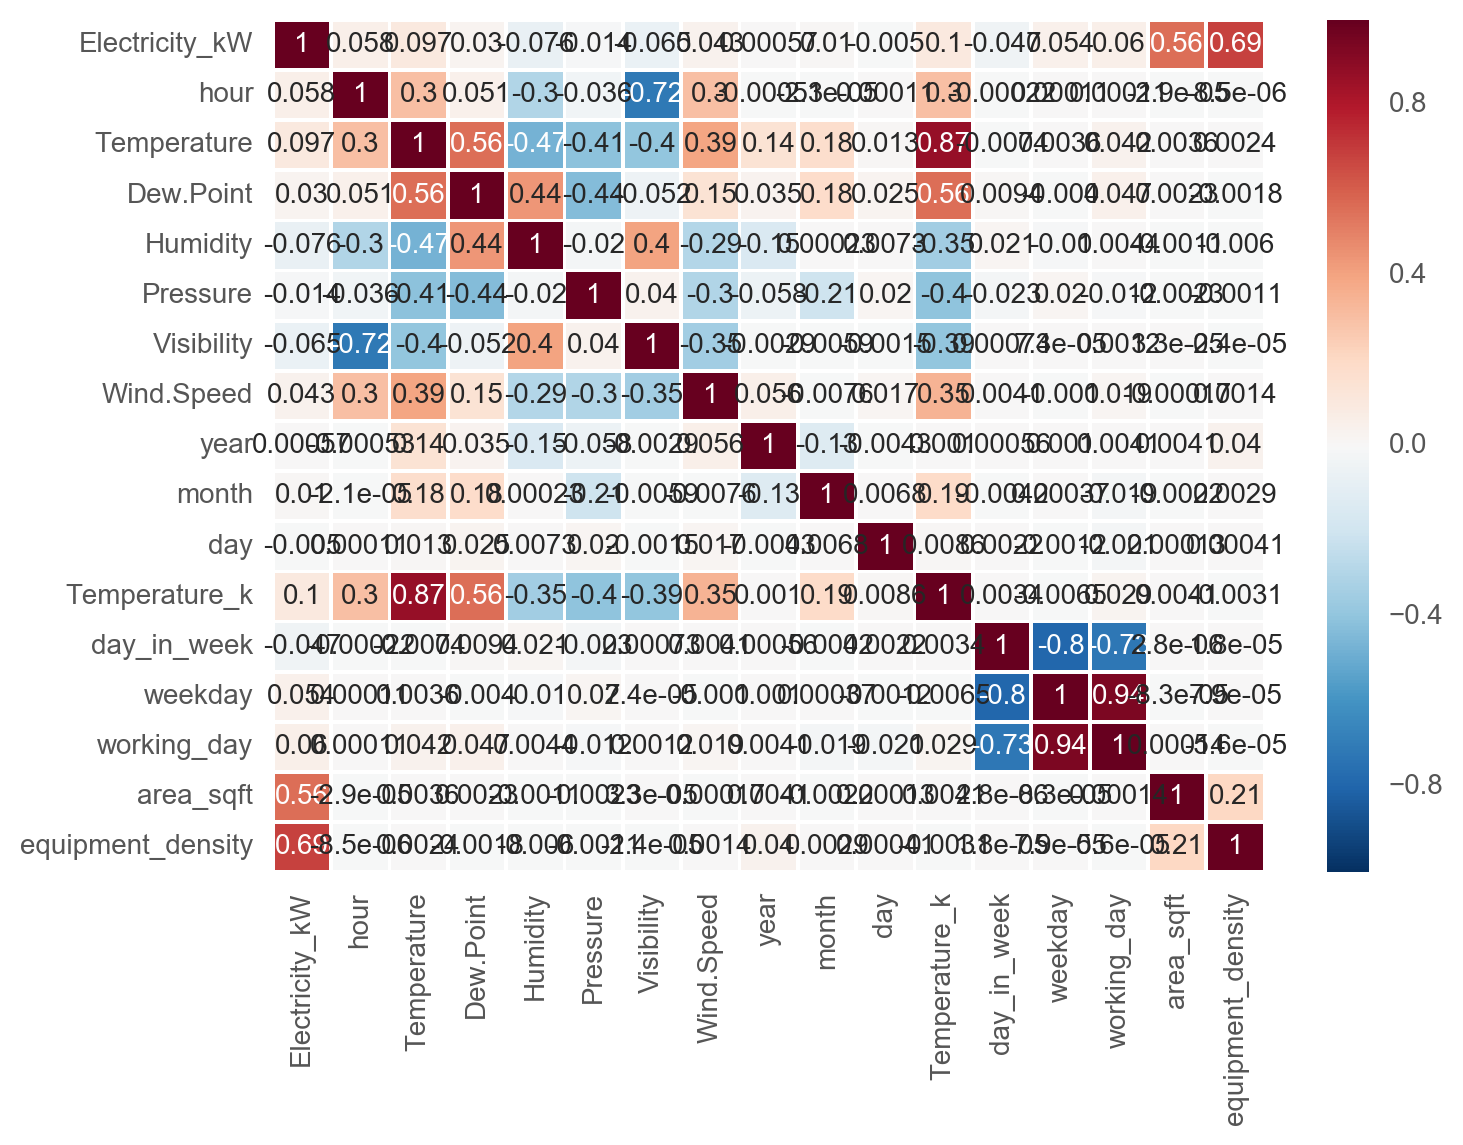

In [17]:
corr=build.corr()
sns.heatmap(corr,annot=True,linewidths=1)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [19]:
build2=build.drop('Date',axis=1).drop('building',axis=1)

In [20]:
build2=build2.drop('Temperature',axis=1)

In [21]:
build2=build2.dropna()

In [22]:
build2.head()

,Electricity_kW,hour,Dew.Point,Humidity,Pressure,Visibility,Wind.Speed,year,month,day,Temperature_k,day_in_week,weekday,working_day,semester_or_not,area_sqft,equipment_density
0,157.824,14,48.0,0.77,30.26,0.0,4.6,2012,1,2,57.38,0.0,1,1,0,140090,1
1,151.040,15,48.0,0.75,30.26,0.0,5.8,2012,1,2,57.20,0.0,1,1,0,140090,1
2,152.512,16,48.9,0.83,30.26,0.0,5.8,2012,1,2,57.20,0.0,1,1,0,140090,1
3,143.296,17,48.0,0.83,30.27,0.0,4.6,2012,1,2,53.96,0.0,1,1,0,140090,1
4,137.920,18,48.0,0.89,30.28,0.0,0.0,2012,1,2,50.18,0.0,1,1,0,140090,1


In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=5, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid()

    return plt

In [24]:
#builddata = build2.values
X=build2.drop('Electricity_kW',axis=1).reset_index().drop('index',axis=1) # all rows, no label
y=build2['Electricity_kW']  # all rows, label only

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
X_train.head()

,hour,Dew.Point,Humidity,Pressure,Visibility,Wind.Speed,year,month,day,Temperature_k,day_in_week,weekday,working_day,semester_or_not,area_sqft,equipment_density
183407,14,54.0,0.53,30.13,0.0,15.0,2016,9,23,71.168,4.0,1,1,1,69730,1
332892,14,59.0,0.66,29.74,0.0,20.7,2013,6,8,106.700,5.0,0,0,0,179722,2
455062,13,48.9,0.50,29.99,0.0,13.8,2015,6,19,76.640,4.0,1,1,0,141000,2
257923,3,57.9,0.75,29.94,10.0,3.5,2015,8,28,65.660,4.0,1,1,1,367529,0
215541,7,48.0,0.86,30.14,10.0,9.2,2012,5,27,51.800,6.0,0,0,0,277388,0


#Random Forest Regressor

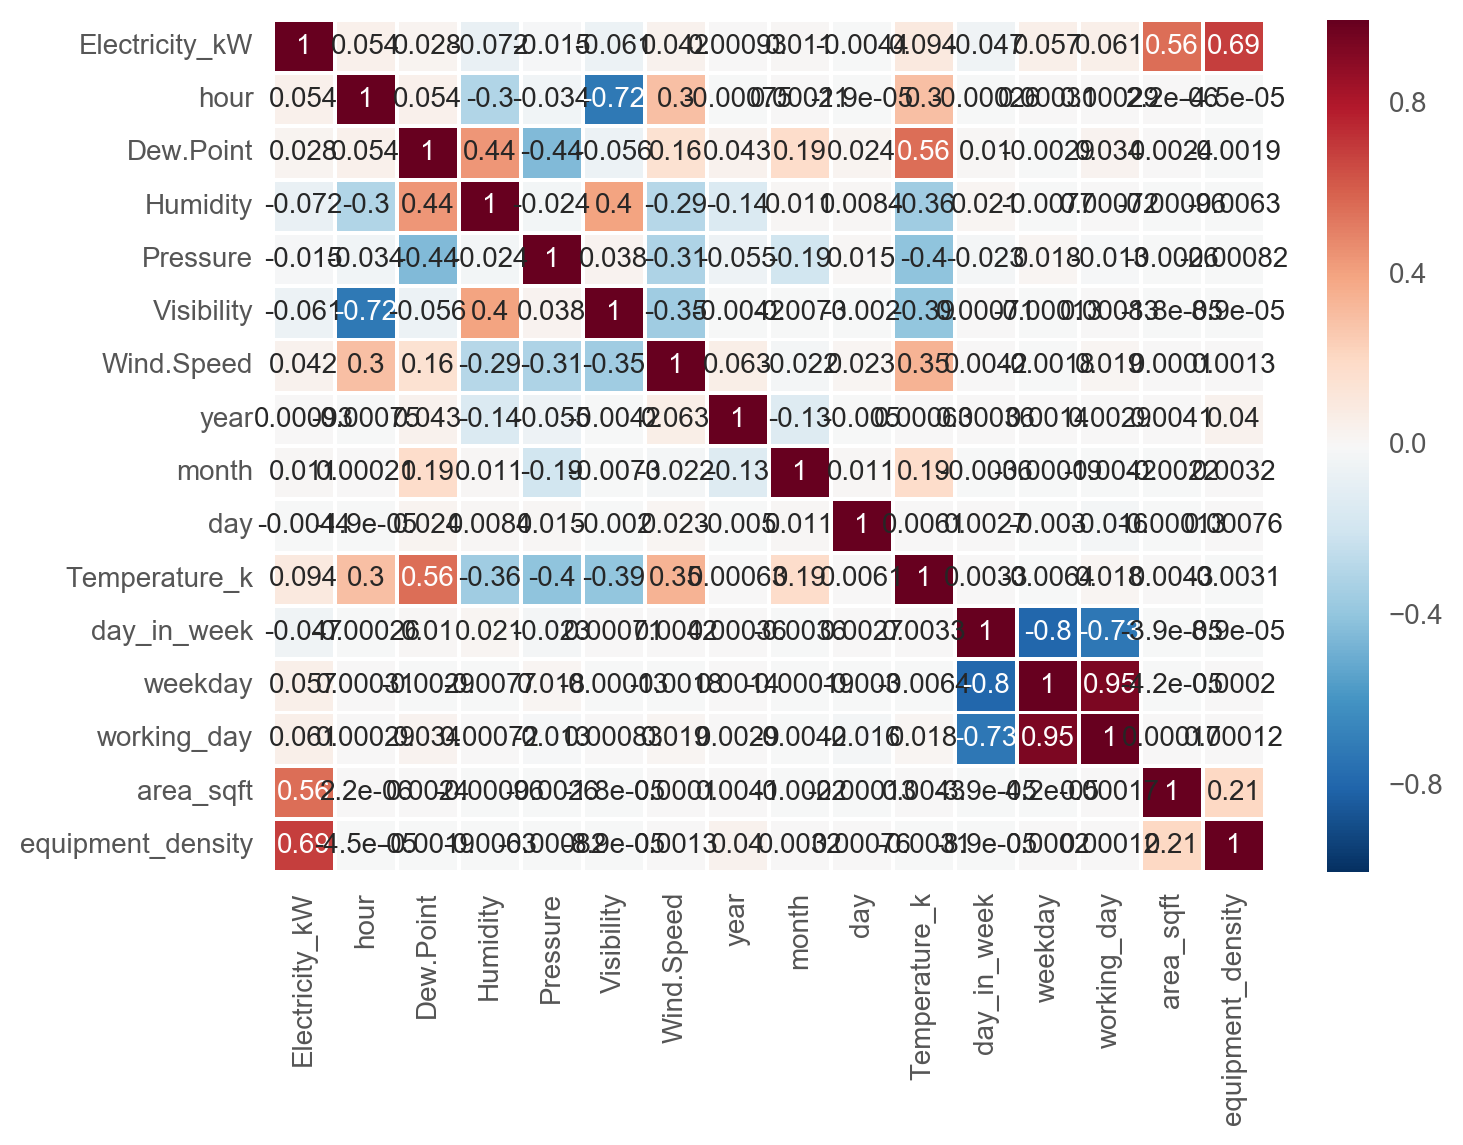

In [26]:
corr=build2.corr()
sns.heatmap(corr,annot=True,linewidths=1)

In [26]:
import matplotlib.pyplot as plt

from collections import OrderedDict

In [27]:
import sklearn.cross_validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

In [ ]:
#Plotting the score for the depths values in order to get an idea on the best possible value of n_estimators and
#avoiding overfitting the data


rfr = RandomForestRegressor(random_state=0)

depth = np.arange(1, 15, 1)        
scores = []

for n in depth:
    rfr = RandomForestRegressor(n_estimators=100,random_state=0, max_depth=n)

    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))



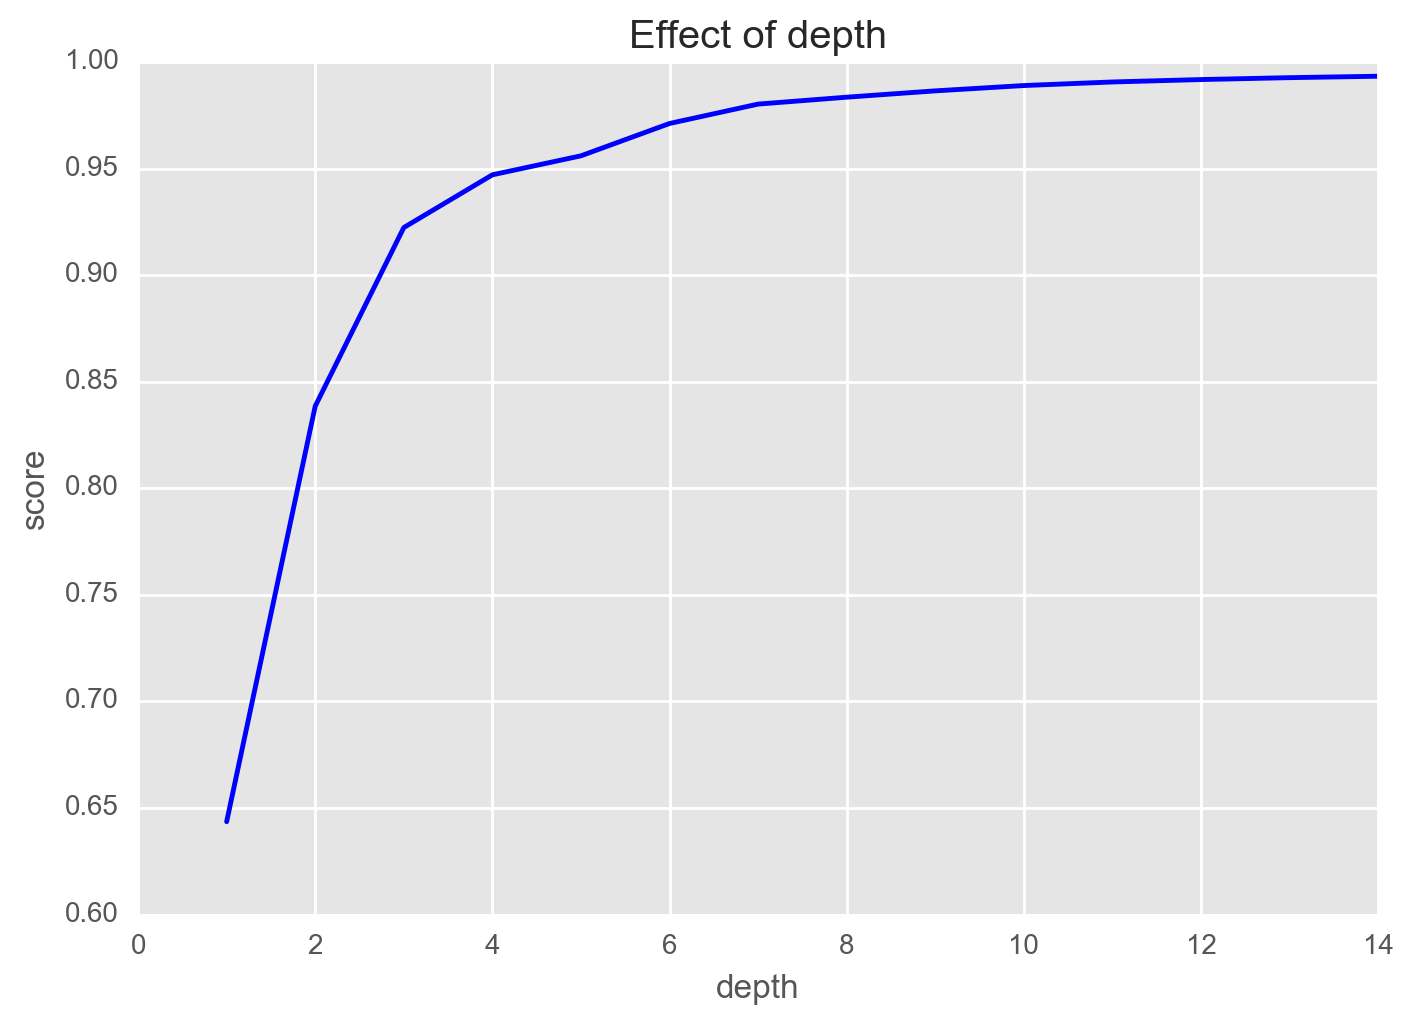

In [32]:
plt.title("Effect of depth")
plt.xlabel("depth")
plt.ylabel("score")

plt.plot(depth, scores,'b')

In [ ]:
#rfr = RandomForestRegressor(max_depth=8 ,random_state=0)

nestimate = np.arange(10, 200, 20)        #between 10 and 300. (would be better use upto 200 for faster run)
scores = []

for n in nestimate:
    rfr = RandomForestRegressor(n_estimators=n,random_state=0 , max_depth=8)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))



In [ ]:
plt.plot(nestimate, scores,'g')
plt.title("Effect of n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("score")

In [32]:
# Use the optimal number of trees for prediction:

rfr = RandomForestRegressor(n_estimators=130, random_state=0, max_features=6,oob_score=True, max_depth=8)
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

#Calculating the root mean squared error for the predictions
import sklearn.metrics

print('Mean Squared error without depth',sklearn.metrics.mean_squared_error(y_test,rfr_pred))
print('Prediction score',rfr.score(X_test,y_test))
print('OOB Error',(1-rfr.oob_score_))

Mean Squared error without depth 5258.80722884
Prediction score 0.969928941911
OOB Error 0.0308810022238


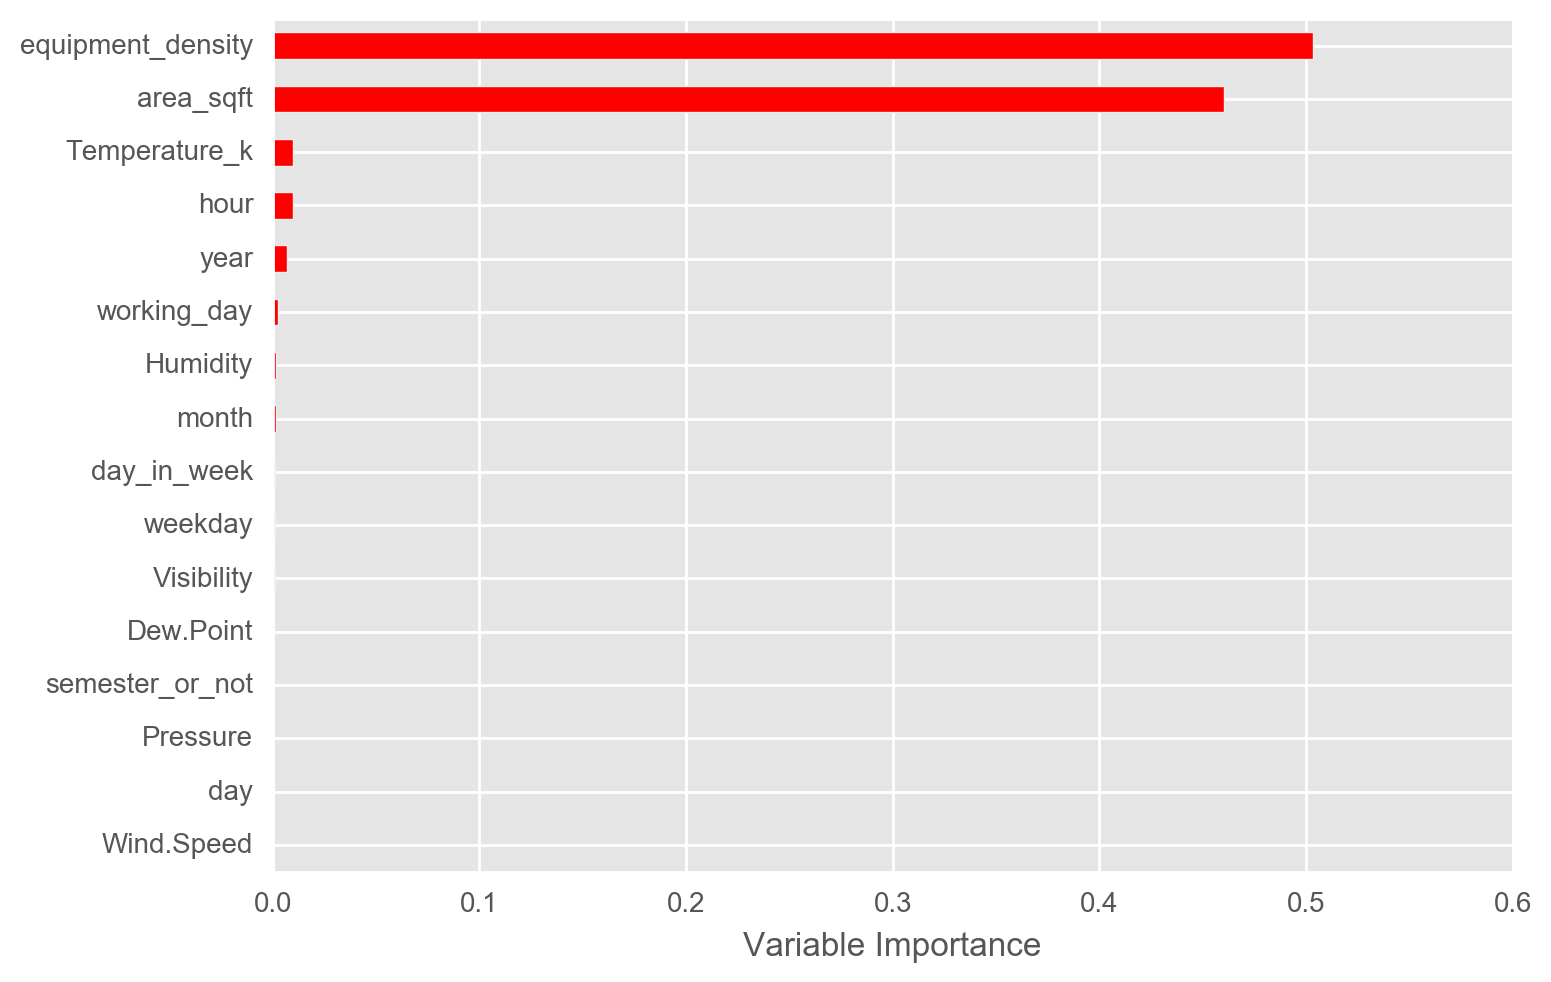

In [34]:
Importance = pd.DataFrame({'Importance':rfr.feature_importances_}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

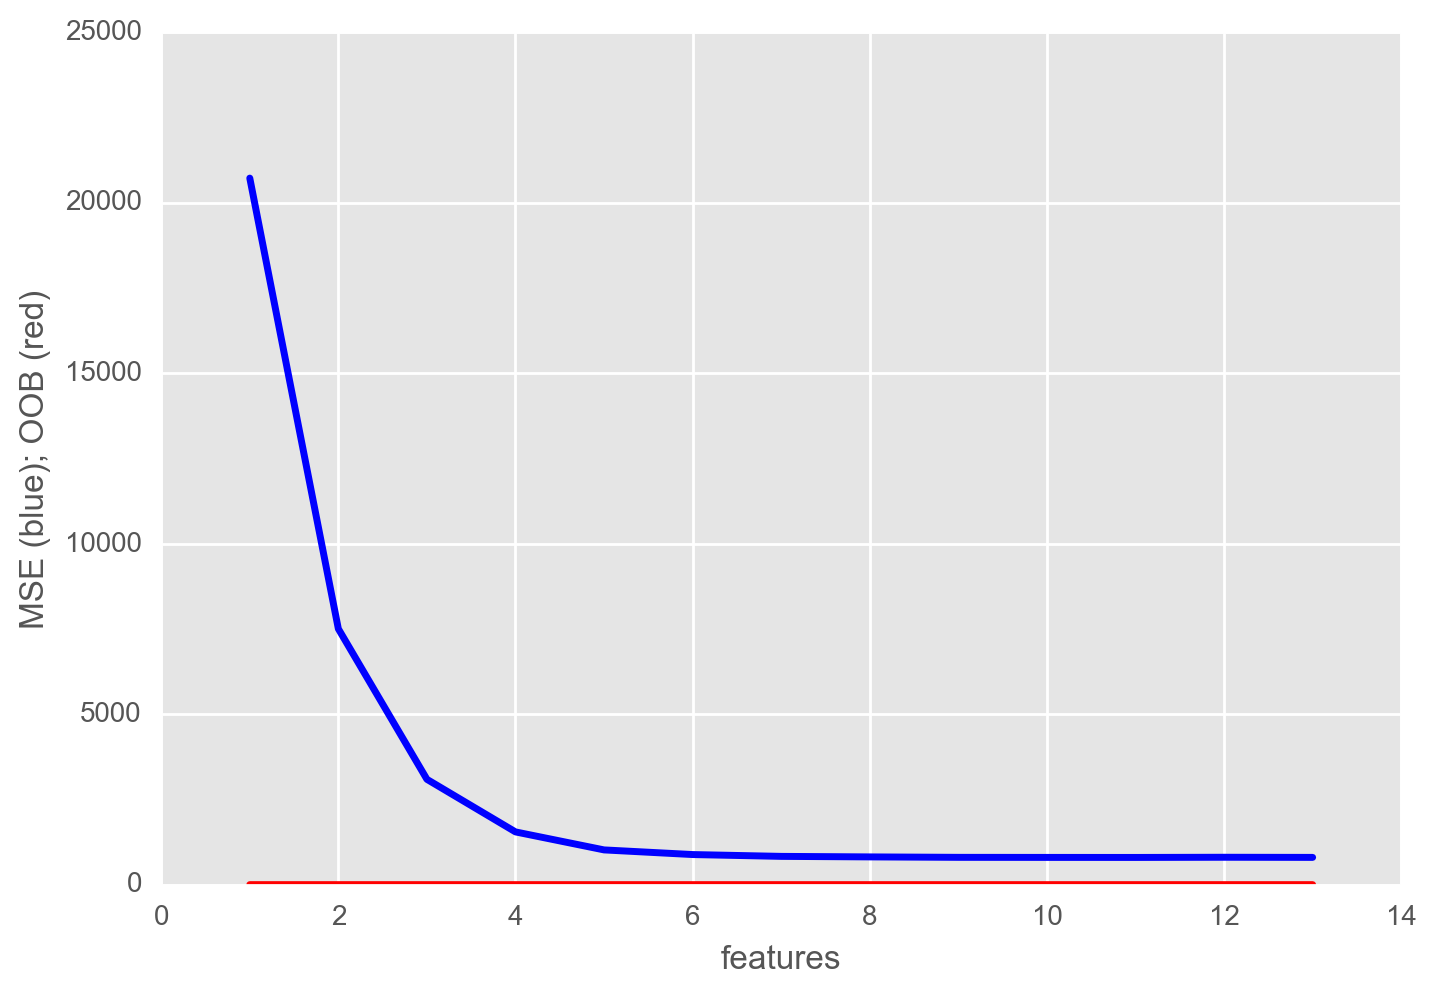

In [38]:
oob_scores = []
mses = []
num_feats = range(1, 14)
for num_feat in num_feats:
    reg = RandomForestRegressor(n_estimators=100, max_features=num_feat, oob_score=True)
    reg.fit(X_train, y_train)
    ypred = reg.predict(X_test)
    mses.append(sklearn.metrics.mean_squared_error(y_test, ypred))
    oob_scores.append(reg.oob_score_)
plt.plot(num_feats, mses, color='b', linewidth=2.5)
plt.plot(num_feats, oob_scores, color='r', linewidth=2.5)
plt.xlabel("features")
plt.ylabel("MSE (blue); OOB (red)")

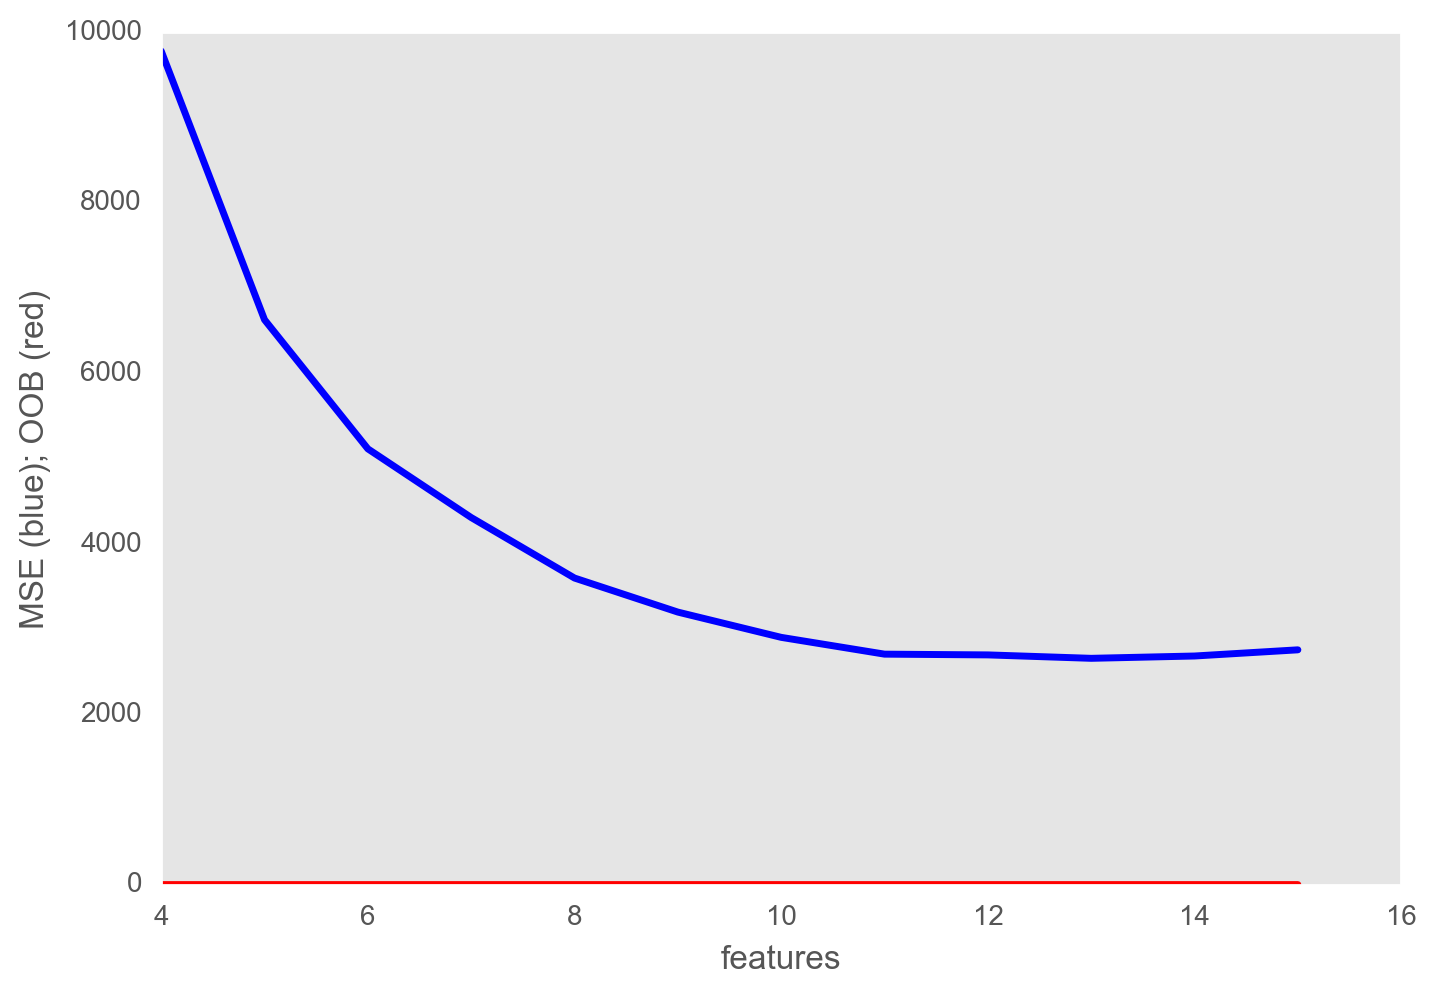

In [29]:
oob_scores = []
mses = []
num_feats = range(4, 16)
for num_feat in num_feats:
    reg = RandomForestRegressor(n_estimators=130, max_depth=8,max_features=num_feat, oob_score=True)
    reg.fit(X_train, y_train)
    ypred = reg.predict(X_test)
    mses.append(sklearn.metrics.mean_squared_error(y_test, ypred))
    oob_scores.append(reg.oob_score_)
plt.plot(num_feats, mses, color='b', linewidth=2.5)
plt.plot(num_feats, oob_scores, color='r', linewidth=2.5)
plt.xlabel("features")
plt.ylabel("MSE (blue); OOB (red)")
plt.grid()
plt.autoscale()
plt.show()

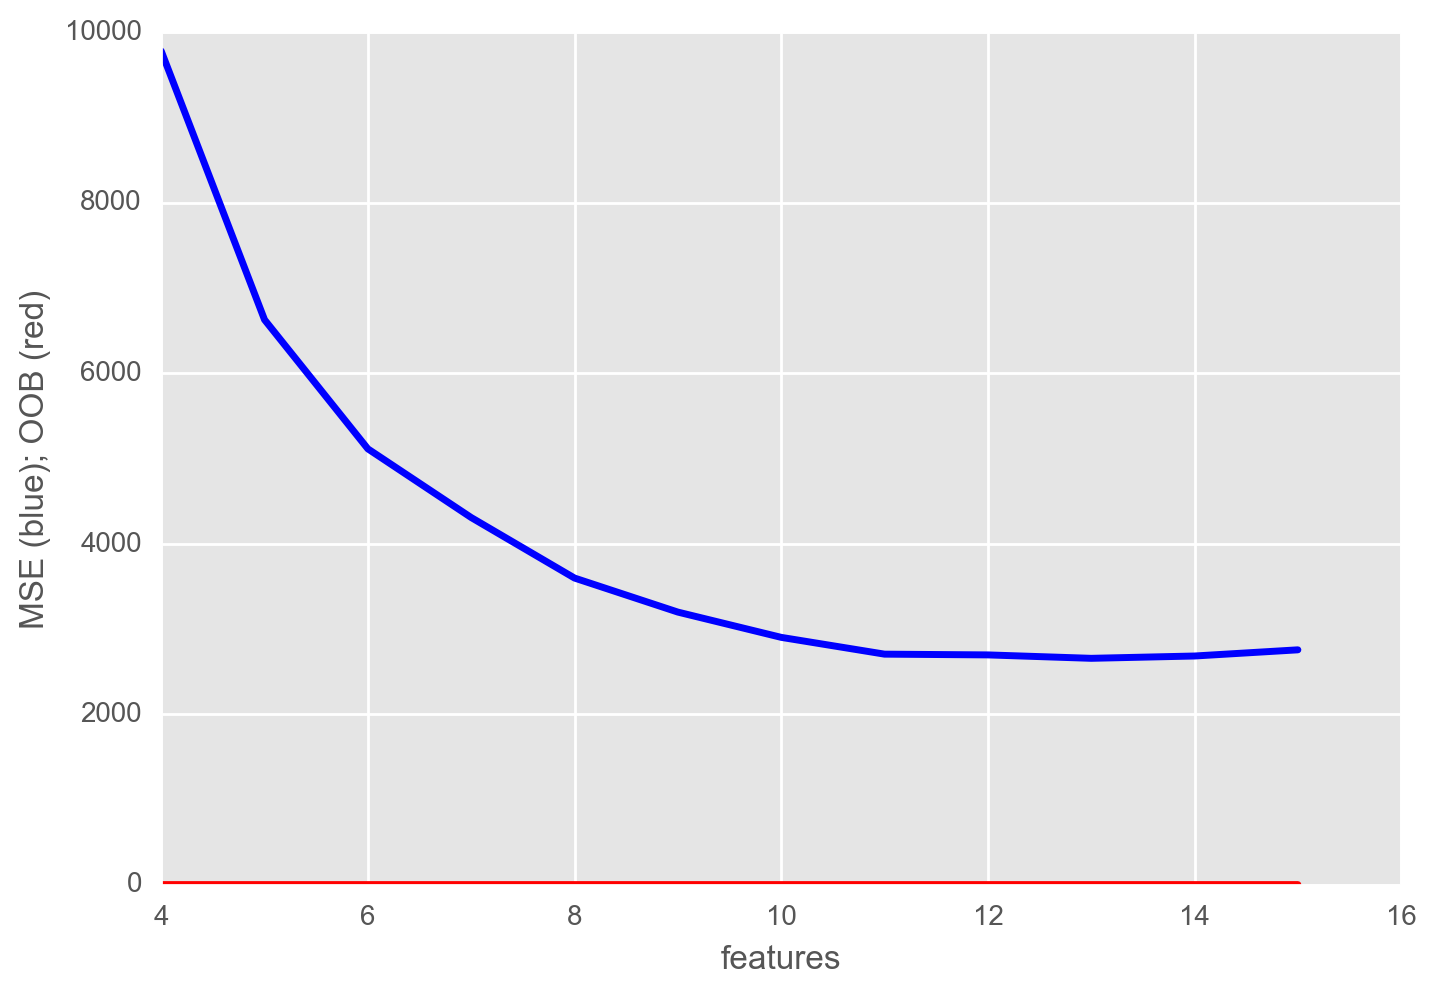

In [30]:
plt.plot(num_feats, mses, color='b', linewidth=2.5)
plt.plot(num_feats, oob_scores, color='r', linewidth=2.5)
plt.xlabel("features")
plt.ylabel("MSE (blue); OOB (red)")
plt.autoscale()
plt.show()

In [40]:
X_test.shape

(122605, 17)

In [41]:
y_test.shape

(122605,)

In [42]:
rfr_pred.shape

(122605,)

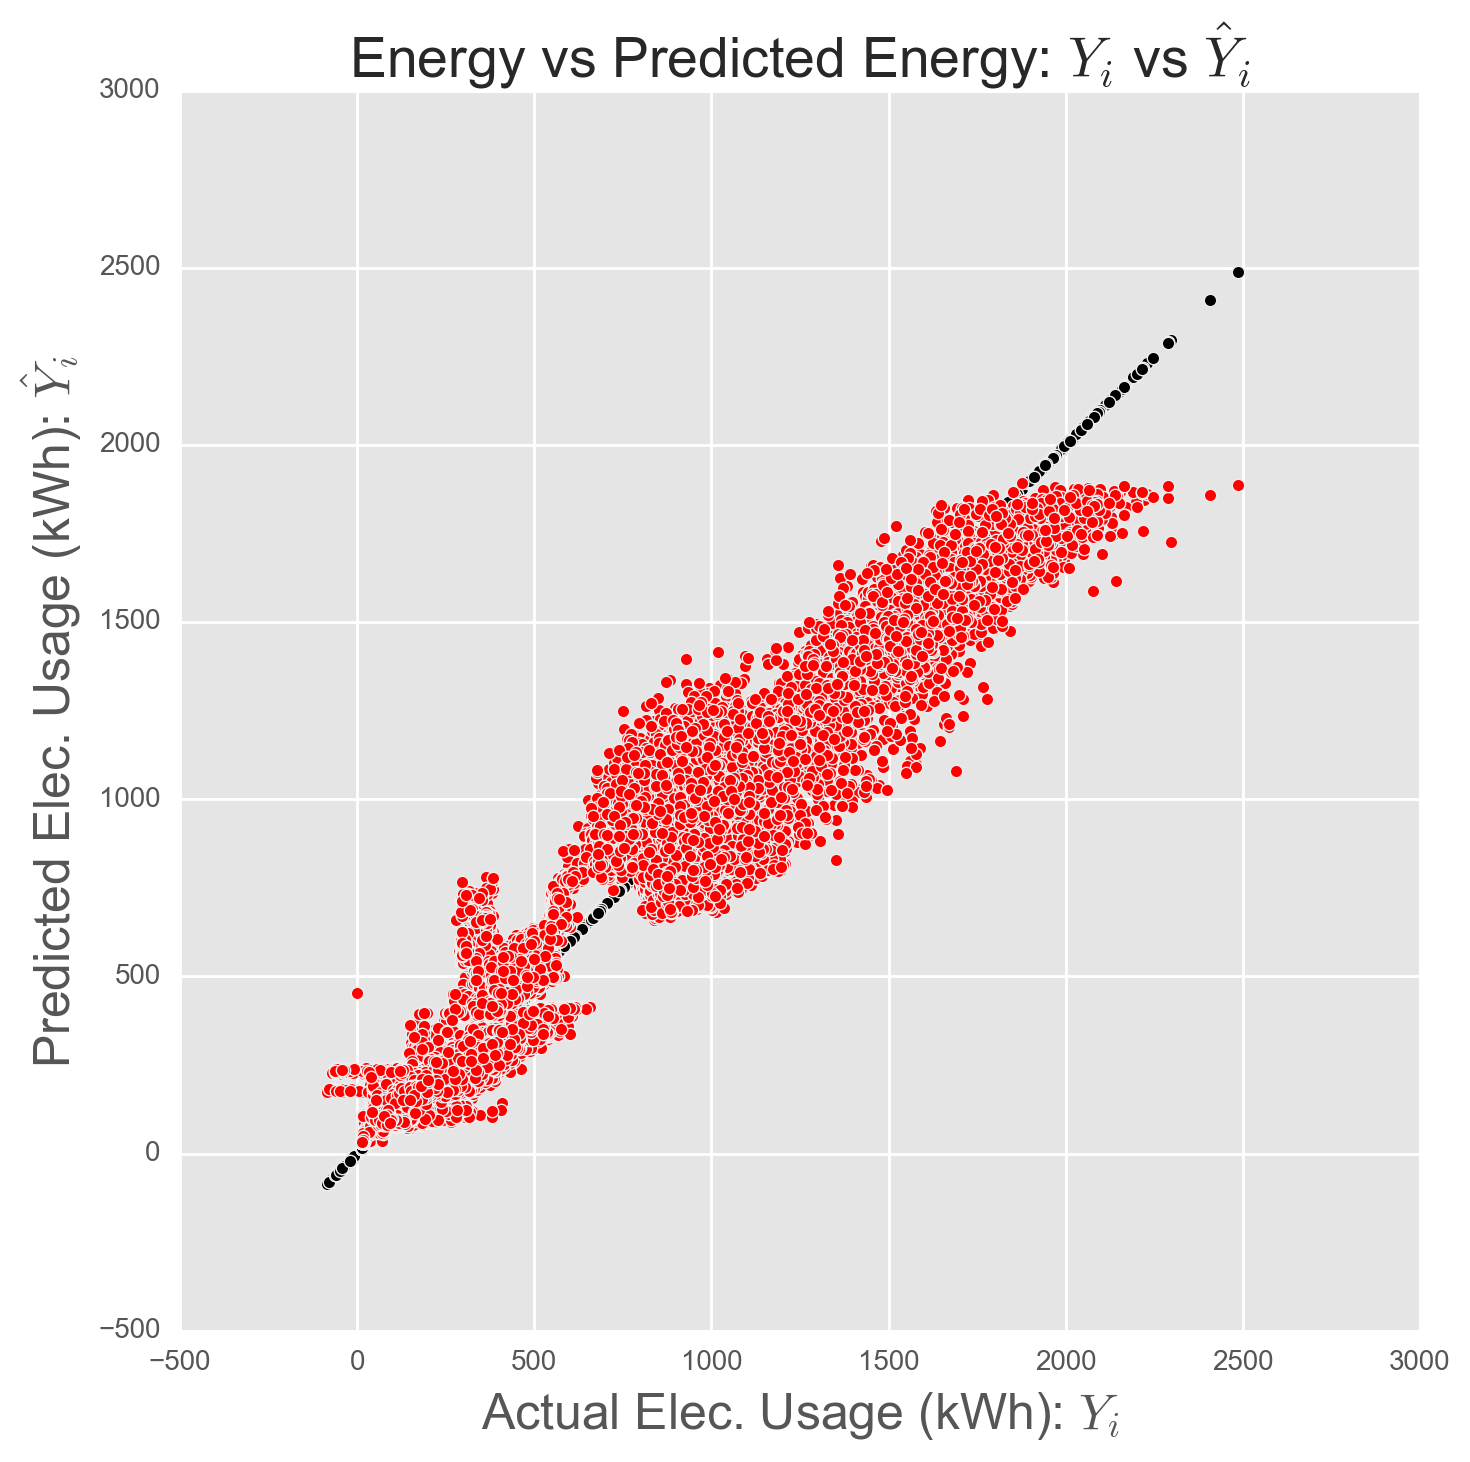

In [35]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, rfr_pred, c='r')
plt.xlabel('Actual Elec. Usage (kWh): $Y_i$',fontsize=18)
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$",fontsize=18)

plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$",fontsize=20)
plt.show()

In [ ]:
#Plot actual vs. prediced usage.
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, rfr_pred, c='r')
plt.xlabel('Actual Elec. Usage (kWh): $Y_i$',fontsize=18)
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$ ",fontsize=18)
plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$",fontsize=20)
plt.show()

In [62]:
print(rfr.feature_importances_)

[  5.63268895e-03   5.65414782e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.17185322e-02   0.00000000e+00
   0.00000000e+00   1.69039786e-03   0.00000000e+00   3.00968345e-01
   6.79424621e-01]


In [63]:
print(rfr.decision_path)

<bound method BaseForest.decision_path of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)>


In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=5, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid()

    return plt

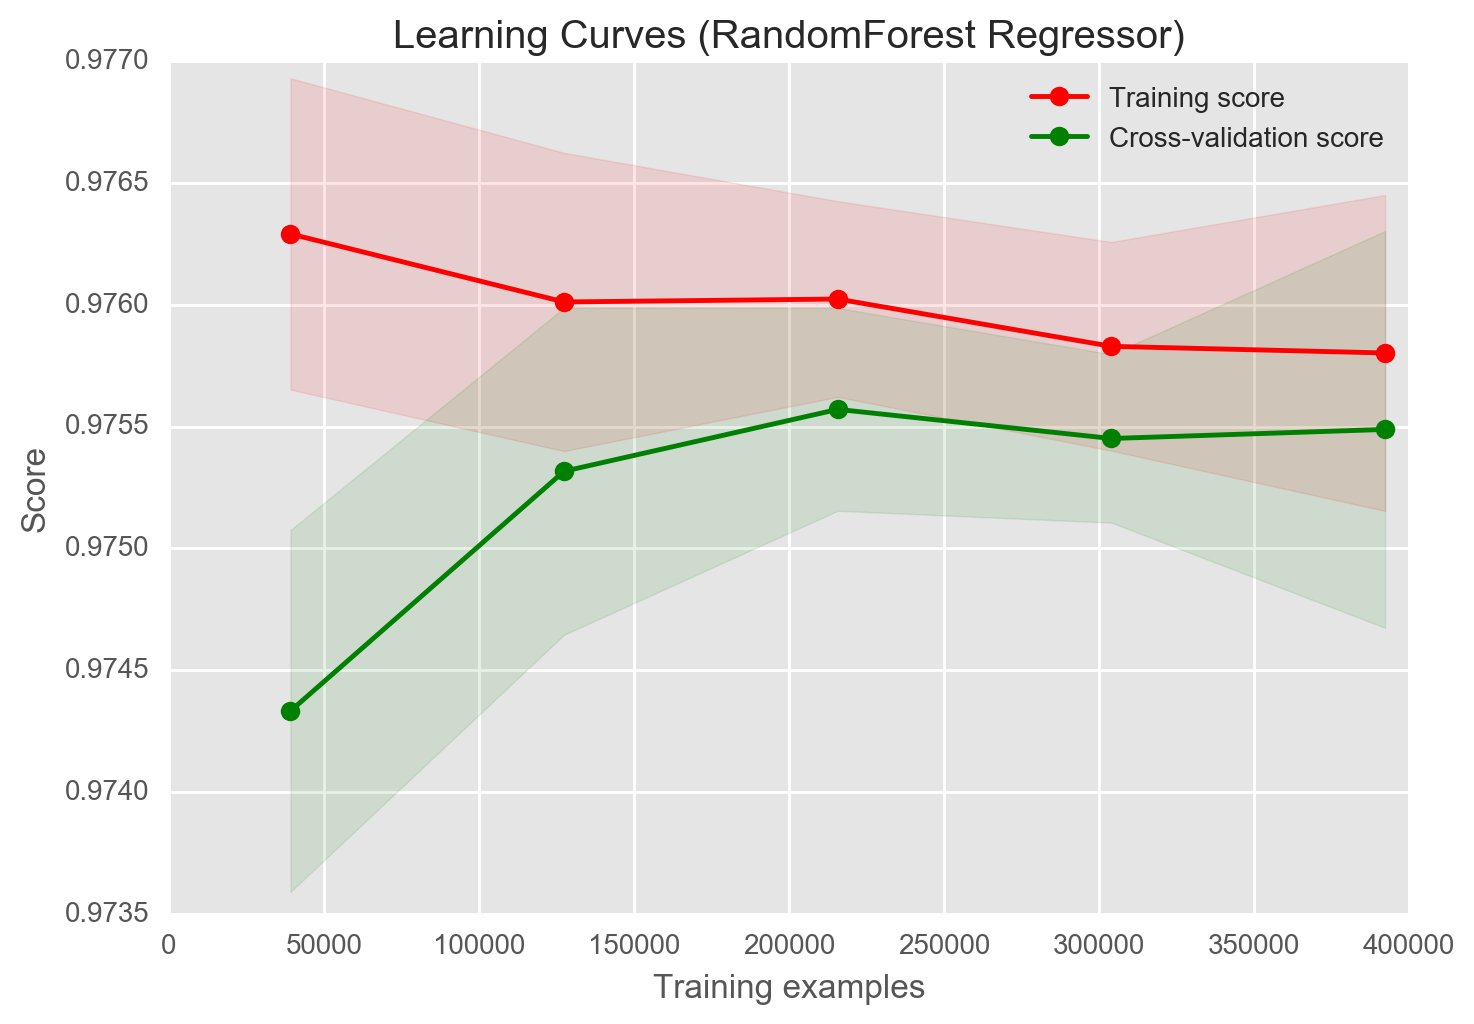

In [43]:
title = "Learning Curves (RandomForest Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
cv = ShuffleSplit(n_splits=10, test_size=0.2)

estimator = RandomForestRegressor(n_estimators=130, max_features=7,max_depth=8, oob_score=True)

plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.1), cv=cv,n_jobs=5)
plt.grid()
plt.autoscale()
plt.legend()
plt.show()

In [36]:
# Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [41]:

dtr = DecisionTreeRegressor(random_state=0, max_features=7, max_depth=8)
dtr.fit(X_train,y_train)
dtr_pred=dtr.predict(X_test)

#Calculating the root mean squared error for the predictions
import sklearn.metrics

print('Mean Squared error without depth',sklearn.metrics.mean_squared_error(y_test,dtr_pred))
print('Prediction score',dtr.score(X_test,y_test))


Mean Squared error without depth 15124.859351
Prediction score 0.913512607644


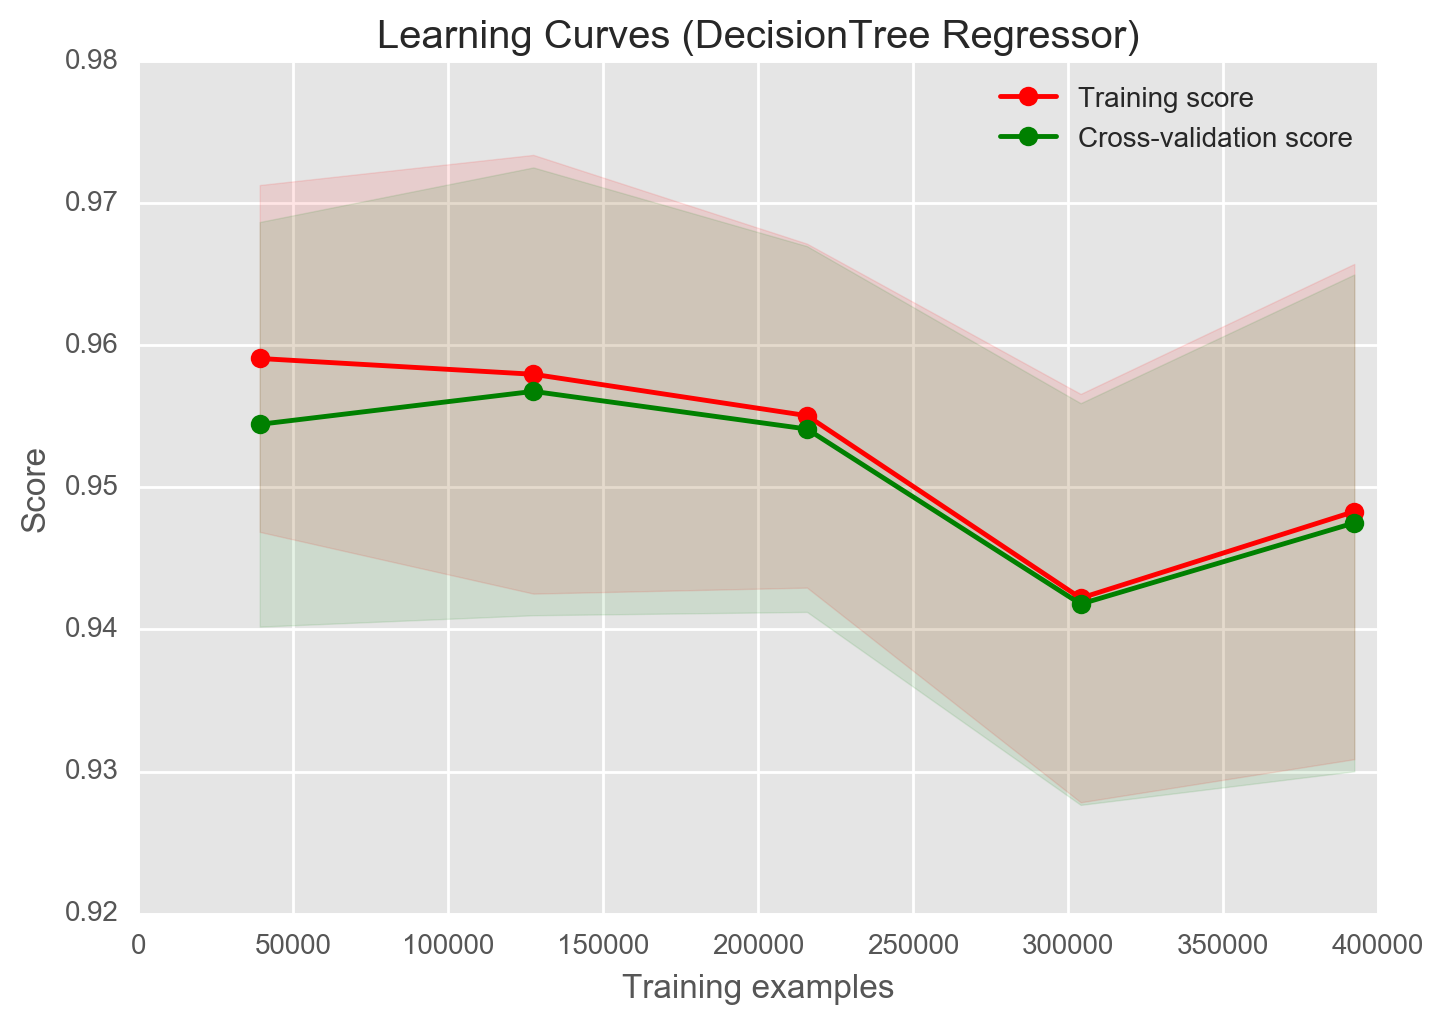

In [42]:
title = "Learning Curves (DecisionTree Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
cv = ShuffleSplit(n_splits=10, test_size=0.2)

estimator = DecisionTreeRegressor(max_features=7,max_depth=8)

plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.1), cv=cv,n_jobs=5)
plt.grid()
plt.autoscale()
plt.legend()
plt.show()

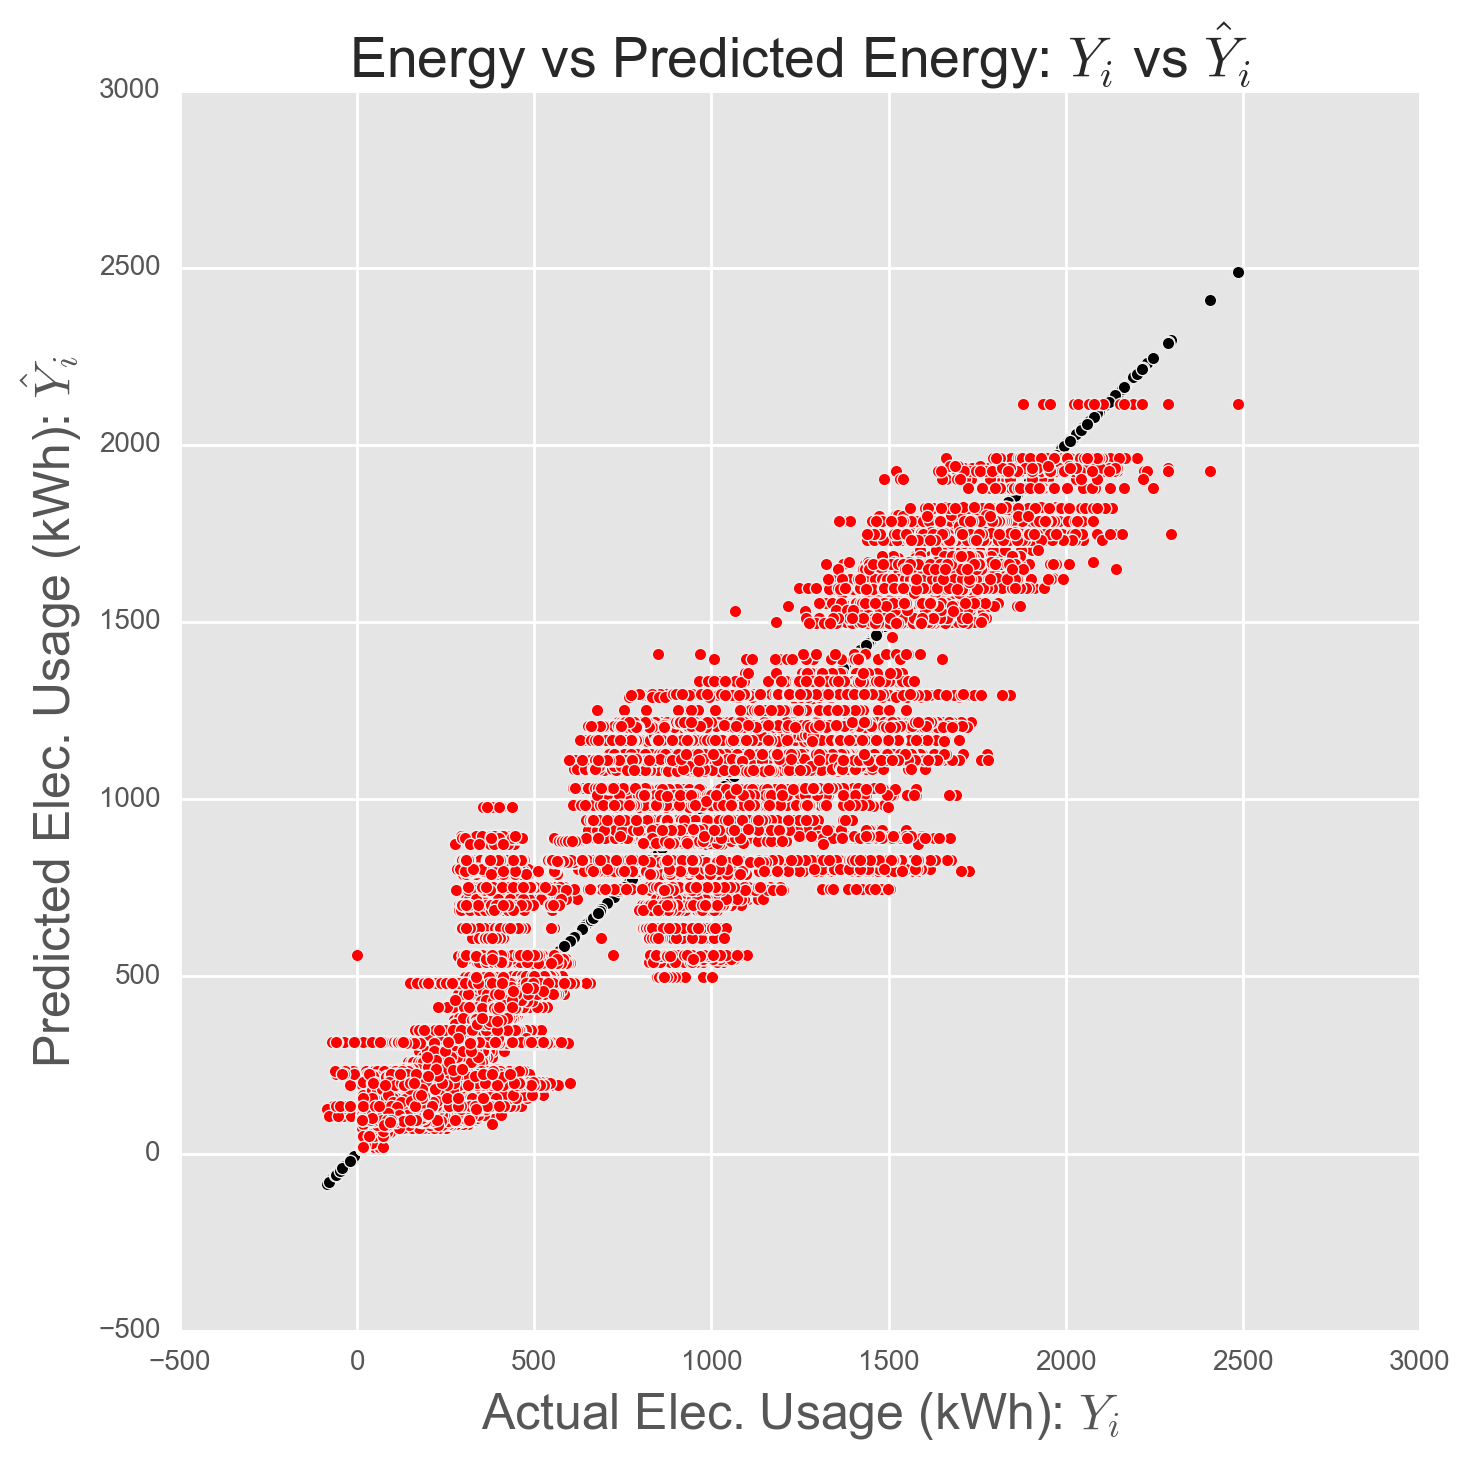

In [44]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, dtr_pred, c='r')
plt.xlabel('Actual Elec. Usage (kWh): $Y_i$',fontsize=18)
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$",fontsize=18)

plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$",fontsize=20)
plt.show()

#KNN

In [38]:
def accuracy_for_k(k,x,y):
    split_data=sklearn.cross_validation.train_test_split(x,y,test_size=0.33,random_state=99)
    X_train,X_test,y_train,y_test=split_data
    knn=sklearn.neighbors.KNeighborsRegressor(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    #Y_hat=knn.predict(X_test)
    value=knn.score(X_test,y_test)
    return value

In [49]:
from sklearn.cross_validation import train_test_split

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.4, random_state=99)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=99)

0.970305077563
The optimal value of k is: 1


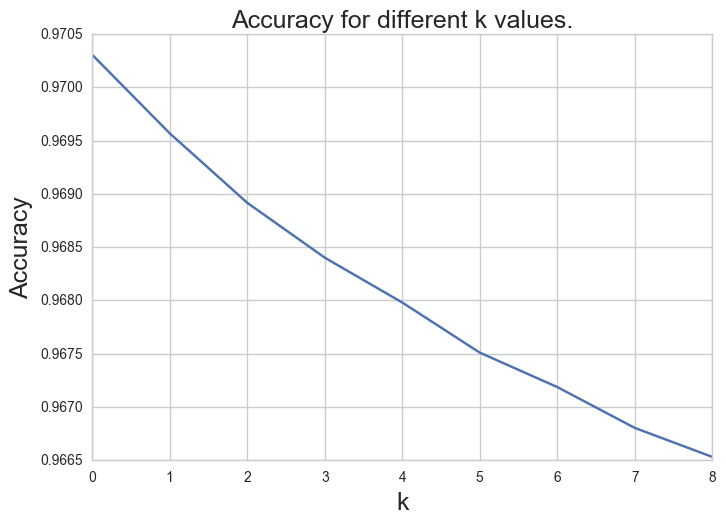

In [51]:
k_values=range(20,110,10)
scoresk=np.zeros(len(k_values))
for k, c_k in zip(k_values,range(len(k_values))):
    value=accuracy_for_k(k=k,x=x_validation,y=y_validation)
    scoresk[c_k]=value
    
k_opt=np.argmax(scoresk)+1
print(scoresk.max())
print ('The optimal value of k is:',k_opt)

sns.tsplot(scoresk.T)
#plt.xticks(range(len(k_values)),k_values)
plt.xlabel('k',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy for different k values.',fontsize=18)
plt.show()

0.973721266853
The optimal value of k is: 1


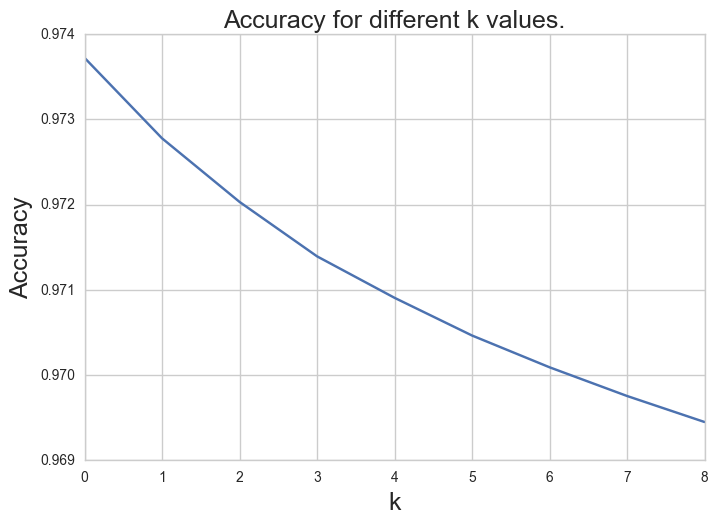

In [52]:
# Find the optimal number of k in knn:
k_values=range(20,110,10)
scoresk=np.zeros(len(k_values))
for k, c_k in zip(k_values,range(len(k_values))):
    value=accuracy_for_k(k=k,x=x_train,y=y_train)
    scoresk[c_k]=value
    
k_opt=np.argmax(scoresk)+1
print(scoresk.max())
print ('The optimal value of k is:',k_opt)

sns.tsplot(scoresk.T)
#plt.xticks(range(len(k_values)),k_values)
plt.xlabel('k',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy for different k values.',fontsize=18)
plt.show()

In [50]:
knn_reg=sklearn.neighbors.KNeighborsRegressor(n_neighbors=10,weights='uniform')
knn_reg.fit(x_train,y_train)
Y_pred=knn_reg.predict(x_test)

print (knn_reg.score(x_test,y_test))



0.978719152328


In [65]:
print(knn_reg.p)

uniform


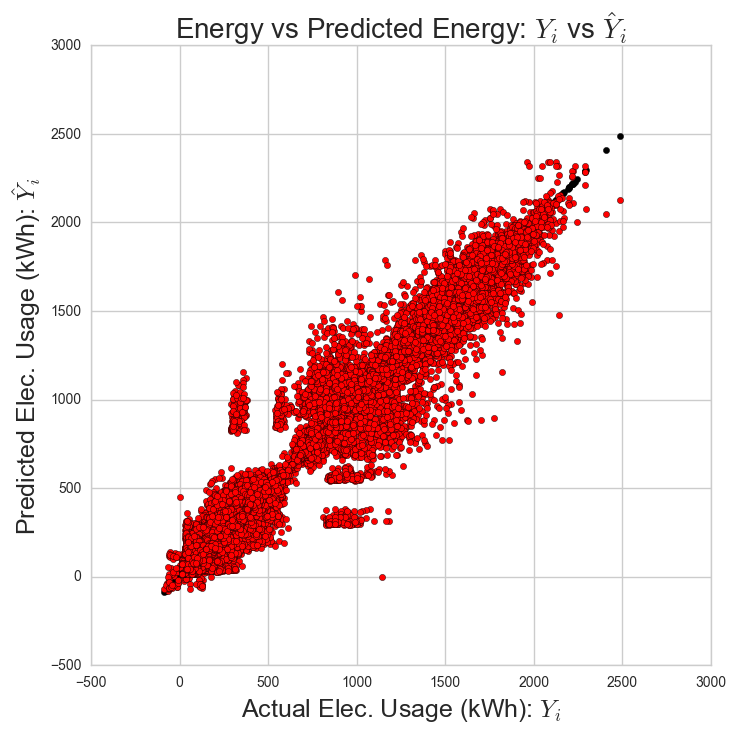

In [47]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, Y_pred, c='r')
plt.xlabel('Actual Elec. Usage (kWh): $Y_i$',fontsize=18)
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$",fontsize=18)

plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$",fontsize=20)
plt.show()

In [ ]:
knn_reg=sklearn.neighbors.KNeighborsRegressor(n_neighbors=10,weights='uniform')
knn_reg.fit(x_train,y_train)
Y_pred=knn_reg.predict(x_test)

print (knn_reg.score(x_test,y_test))

knn_reg.fit(x_validation,y_validation)
print (knn_reg.score(x_validation,y_validation))


In [ ]:
#RFR

In [37]:
import sklearn.cross_validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
scores = pd.DataFrame()
estimators = np.arange(0, 100, 10)
for n in estimators:
    rfr=RandomForestRegressor(n_estimators=n,max_features='log2' random_state=0)
    #rfr.fit(X_train,y_train)
    #rfr_predict= rfr.predict(X_test)
    score = cross_val_score(rfr, X_train, y_train)
    scores[n] = score


SyntaxError: invalid syntax (<ipython-input-37-a89e562470a5>, line 7)

In [59]:
scores

,40,50,60,70,80,90,100,110,120,130,140
0,0.989092,0.989755,0.989900,0.989979,0.989969,0.990095,0.990115,0.990051,0.990135,0.990291,0.990398
1,0.988445,0.988946,0.989121,0.989329,0.989686,0.989642,0.989658,0.989698,0.989804,0.989906,0.990058
2,0.988986,0.989439,0.989544,0.989655,0.989621,0.989712,0.989670,0.989668,0.989835,0.989912,0.990018


In [72]:
scores2 = pd.DataFrame()
estimators = np.arange(10, 100, 10)
for n in estimators:
    rfr=RandomForestRegressor(n_estimators=n, random_state=0)
    #rfr.fit(X_train,y_train) 
    #rfr_predict= rfr.predict(X_test)
    score2 = cross_val_score(rfr, X_train, y_train)
    scores2[n] = score2

In [73]:
scores2

,10,20,30,40,50,60,70,80,90
0,0.993709,0.994114,0.994162,0.994187,0.994216,0.994252,0.994284,0.994292,0.994316
1,0.993773,0.994106,0.994238,0.994287,0.994346,0.994371,0.994393,0.994417,0.994433
2,0.993640,0.993955,0.994078,0.994157,0.994178,0.994201,0.994224,0.994236,0.994241


C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


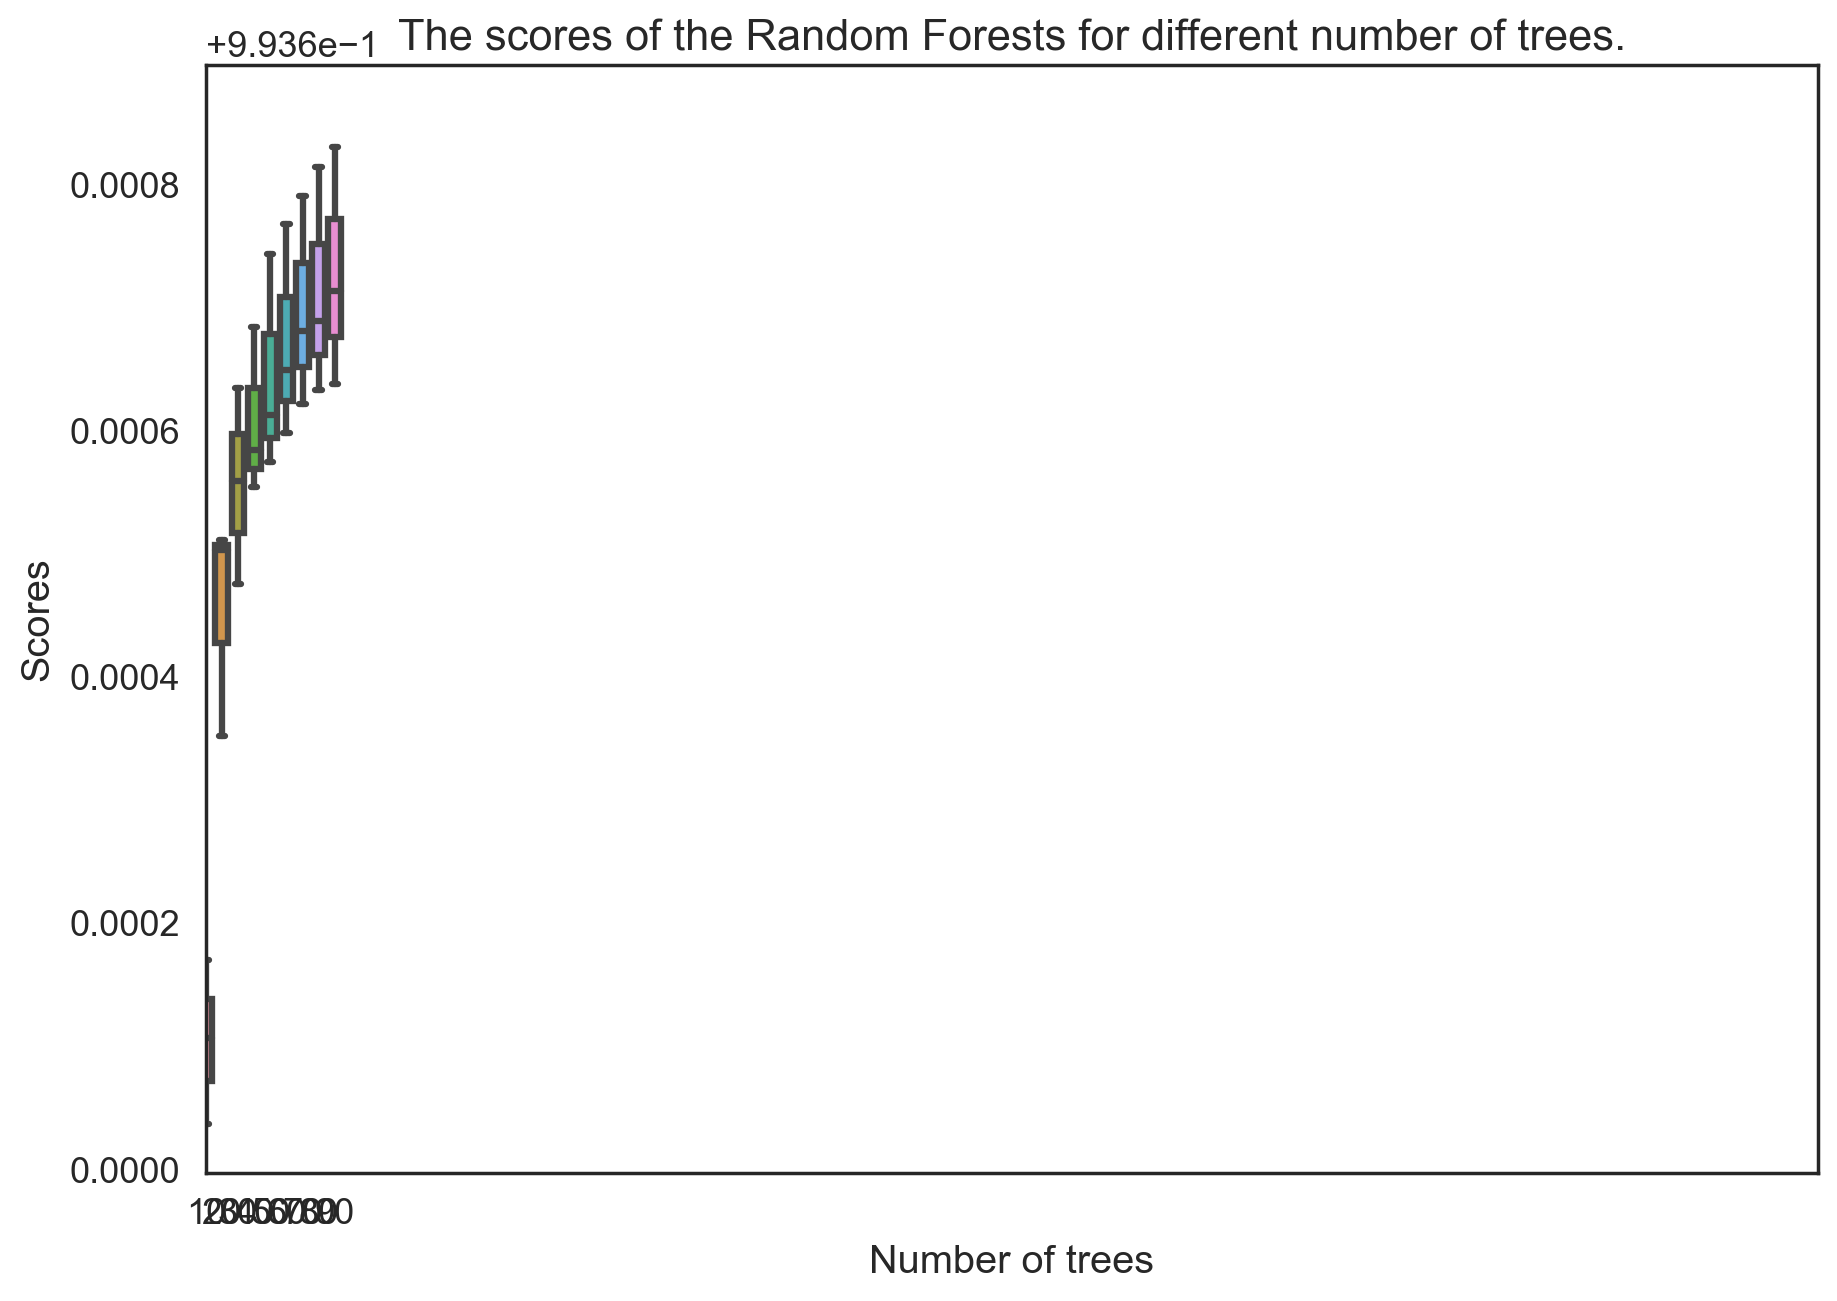

In [83]:
sns.set_context("talk")
sns.set_style("white")
sns.boxplot(scores2)
#sns.boxplot(scores2)
#sns.boxplot(scores)
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.title("The scores of the Random Forests for different number of trees.")
plt.xlim(0,100)
plt.show()

812.98720819750281

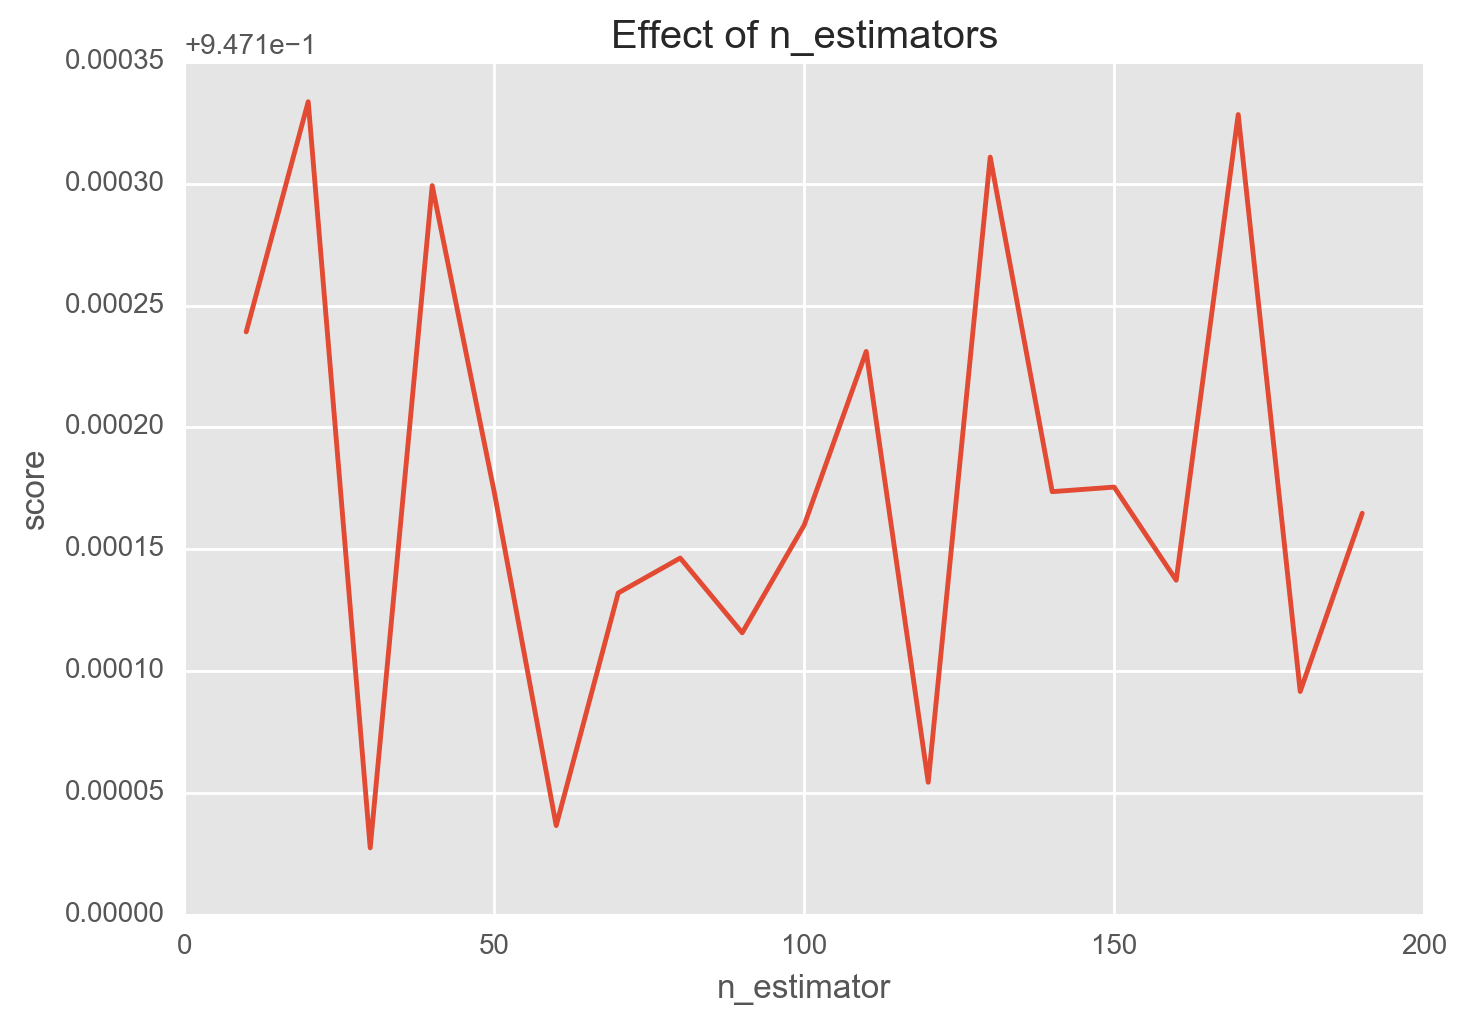

In [31]:
#Plotting the score for the various n estimator values in order to get an idea on the best possible value of n_estimators and
#avoiding overfitting the data

reg_r=RandomForestRegressor(max_depth=4,max_features='log2')

estimators = np.arange(10, 200, 10)        #between 10 and 400. (would be better use upto 200 for faster run)
scores = []
for n in estimators:
    reg_r.set_params(n_estimators=n) 
    reg_r.fit(X_train, y_train)
    scores.append(reg_r.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [40]:
#ELastic Net testing

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


In [41]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)


In [42]:
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.666602


In [43]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.667854


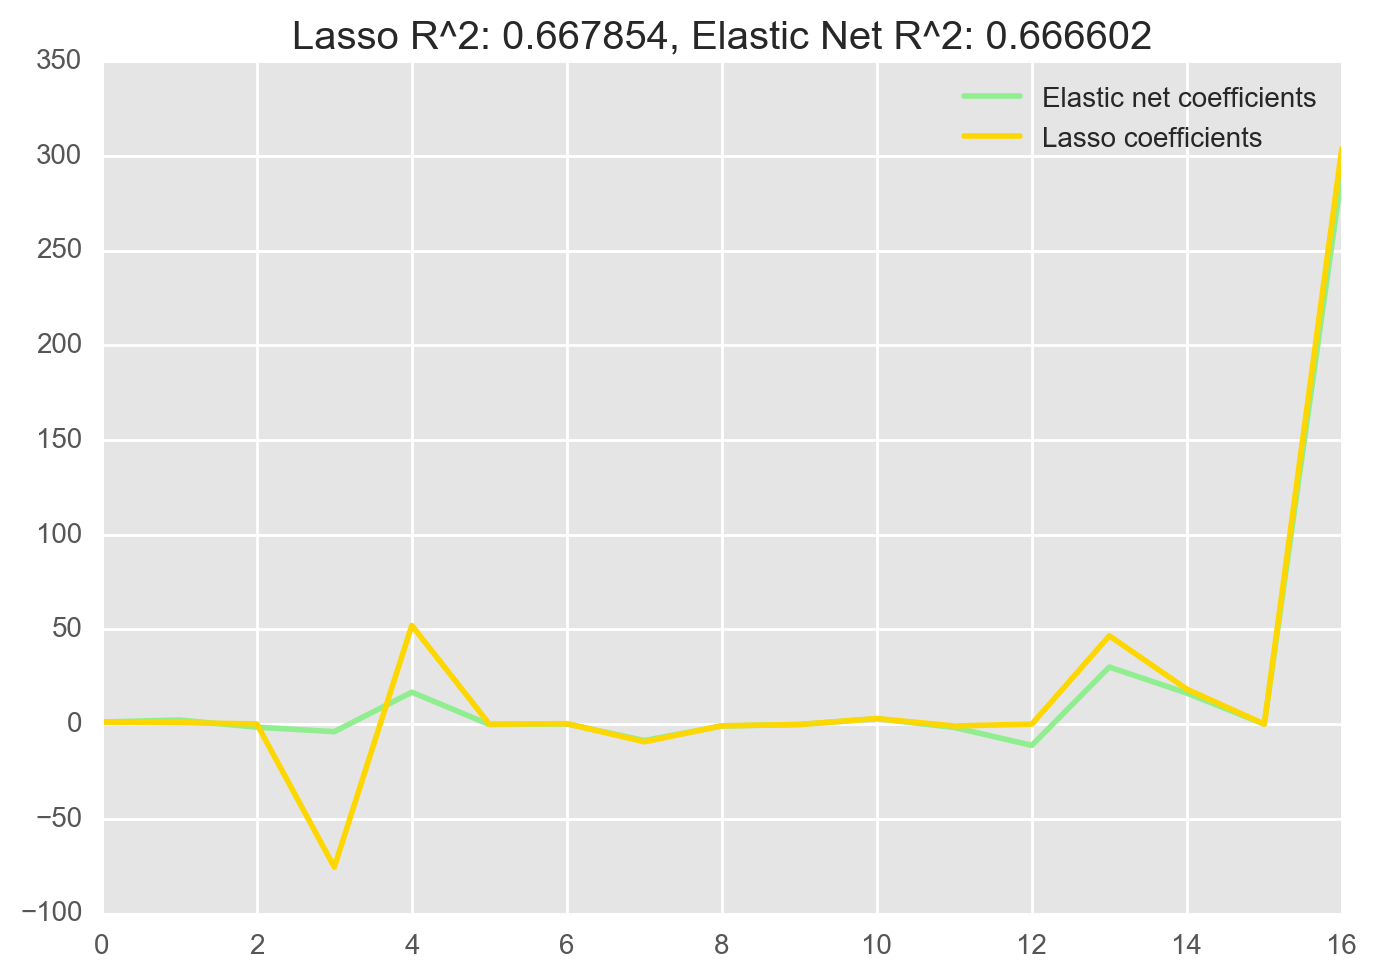

In [45]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [75]:
dtreg= DecisionTreeRegressor(max_depth = 4, max_features=6, presort=True)

In [76]:
dtreg_fit=dtreg.fit(X_train,y_train)

In [77]:
y_dtreg=dtreg_fit.predict(X_test)

In [78]:
dtreg_fit.score(X_test,y_test)

0.94663965831519592

In [80]:
print('Mean Squared error with depth',sklearn.metrics.mean_squared_error(y_test,y_dtreg))


Mean Squared error with depth 9331.62211184


In [35]:
import pydotplus
from sklearn import tree
from IPython.display import Image


In [81]:
dtreg= DecisionTreeRegressor()
dtreg_fit=dtreg.fit(X_train,y_train)
y_dtreg=dtreg_fit.predict(X_test)
print('The prediction score is:',dtreg_fit.score(X_test,y_test))
print('Mean Squared error without depth',sklearn.metrics.mean_squared_error(y_test,y_dtreg))


The prediction score is: 0.990415806644
Mean Squared error without depth 1676.07754781


In [82]:
print(dtreg_fit.decision_path)

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>


In [83]:
dtreg.feature_importances_

array([  1.28115499e-02,   3.53688425e-03,   6.71743984e-04,
         9.74714213e-04,   1.49876917e-03,   8.62322675e-05,
         6.22122350e-04,   1.02412353e-02,   5.88990049e-03,
         1.57259973e-03,   1.48437160e-02,   7.43341701e-04,
         7.95870472e-04,   4.50220304e-03,   1.20298542e-03,
         2.93792377e-01,   6.46213755e-01])